In [ ]:
# Hello, this time we are going to use a movies dataset to create an analysis of the popularity of the movies and their productions

In [2]:
# first we import the libraries we are going to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# second we import the dataset 
dataframe = pd.read_csv("mymoviedb.csv")

In [4]:
# we test it by priting its head
dataframe.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",NaN,NaN,NaN
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",NaN,NaN,NaN
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,NaN,NaN,NaN
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",NaN,NaN,NaN
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",NaN,NaN,NaN


In [5]:
# It seems like it s not that clean at all, we need to check its shape
dataframe.shape

(9837, 11)

In [6]:
# After the shape we need to check for null
dataframe.isnull().sum()

Release_Date            0
Title                   9
Overview                9
Popularity             10
Vote_Count             10
Vote_Average           10
Original_Language      10
Genre                  11
Unnamed: 8           9837
Unnamed: 9           9837
Unnamed: 10          9835
dtype: int64

In [7]:
#  Unnamed 8 and 9 are fully null, they are useless, but in unnamed 10 there are two values
# let's check them out

rslt_dataframe = dataframe.loc[dataframe['Unnamed: 10'].notnull()]
rslt_dataframe['Unnamed: 10']



5875    https://image.tmdb.org/t/p/original/1A5cWPvPnw...
8161    https://image.tmdb.org/t/p/original/1ccS2LCMDz...
Name: Unnamed: 10, dtype: object

In [8]:
# After checking, The three Unnamed columns are pretty much useless, we don't need them at all so
# Let's drop them
df=dataframe.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War"


In [9]:
# After dropping the big problems we need to check if they are really gone

df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
dtype: int64

In [10]:
# Now, let's see the tiny problems and how much will they affect us 

rslt_dataframe = dataframe.loc[dataframe['Unnamed: 10'].notnull()]
df.loc[df["Title"].isnull()]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
1106,- Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,- If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,- Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,- Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,- Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,- Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,- Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,- Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,- Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# as we see, they are nearly full null, and the release date is a title. 
# this is pretty much a disaster

df.loc[df["Title"].isnull()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
1106,- Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,- If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,- Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,- Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,- Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,- Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,- Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,- Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,- Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# They are the same, I think it is obvious we need to drop them
df.loc[df["Original_Language"].isnull()]



,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,NaN,NaN,NaN,NaN
1106,- Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,- If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,- Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,- Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,- Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,- Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,- Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,- Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,- Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# There are two more columns that will be problems if we keep them
df.loc[df["Genre"].isnull()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,NaN,NaN,NaN,NaN
1106,- Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,- If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,- Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,- Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,- Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,- Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,- Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,- Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,- Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# For what we need this time we need to delete every null values 
df = df.dropna(axis = 0,how="any")

In [15]:
# Now let's check for null values again
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [16]:
# Seems like a tidy data
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War"


In [17]:
#na3n zokom la3bed 
df.dtypes 
# zoubii xD, 3amla 9a7ba hal dataset 
df['Vote_Average'] = df['Vote_Average'].astype(float)
df.dtypes 

Release_Date          object
Title                 object
Overview              object
Popularity            object
Vote_Count            object
Vote_Average         float64
Original_Language     object
Genre                 object
dtype: object

In [18]:
# We tried to convert vote-count to float but wasn't possible let's check if it has other values 
# than numeric 
df.loc[df['Vote_Count'].str.isnumeric()==False]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
146,2020-09-02,After We Collided,Tessa finds herself struggling with her compli...,she faces a dilemma that could change their l...,221.992,4481.000,7.3,en
150,2009-03-19,Knowing,A teacher opens a time capsule that has been d...,in it are some chilling predictions -- some t...,218.406,4251.000,6.1,en
2264,2017-03-31,Teen Titans: The Judas Contract,Tara Markov is a girl who has power over earth...,she is also more than she seems. Is the newes...,37.359,521.000,7.5,en
2943,1999-10-27,The Messenger: The Story of Joan of Arc,In 1429 a teenage girl from a remote French vi...,that she would defeat the world's greatest ar...,30.707,1127.000,6.3,en
3630,2013-04-20,Steins,Gate: The Movie − Load Region of Déjà Vu,"One year after the events of the anime, Rintar...",26.328,217.000,7.6,ja
3849,2012-10-12,Girl vs. Monster,Skylar finds out that her parents are monster ...,so she and her techno friends must recapture ...,25.205,235.000,6.4,en
4101,2019-12-13,Bombshell,Bombshell is a revealing look inside the most ...,and the explosive story of the women who brou...,24.08,2328.000,6.8,en
4278,2007-02-01,Scars 2,Diana Golden and Martha Ortiz are the stars of...,one of the characters learned that being a tr...,23.4,5.000,8.4,es
4634,2013-07-18,Khumba,A half-striped zebra is blamed for the drought...,they defeat the tyrannical leopard and save h...,22.203,205.000,6,en
5583,1988-12-11,Rain Man,Selfish yuppie Charlie Babbitt's father left a...,they travel cross-country.,19.434,4999.000,7.8,en


In [19]:
# let's remove them, It will remove the string in popularity too, I hope that's all of it
df['Vote_Count'] = df['Vote_Count'].str.extract('(\d+)', expand=False)


In [20]:
# Now let's try again
df['Vote_Count'] = df['Vote_Count'].astype(float)
df.dtypes 

Release_Date          object
Title                 object
Overview              object
Popularity            object
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
dtype: object

In [21]:
# well It wasn't all we need to clean pop
df['Popularity'] = df['Popularity'].str.extract('(\d+)', expand=False)

In [22]:
# now let's try to convert again
df['Popularity'] = df['Popularity'].astype(float)
df.dtypes 

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
dtype: object

In [23]:
df['Original_Language'] = df['Original_Language'].astype("string")
df.dtypes 

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     string
Genre                 object
dtype: object

In [24]:
# now let's check for null again
df.isnull().sum()

Release_Date          0
Title                 0
Overview              0
Popularity           12
Vote_Count            2
Vote_Average          0
Original_Language     0
Genre                 0
dtype: int64

In [25]:
df.loc[df['Popularity'].isnull()==True]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
146,2020-09-02,After We Collided,Tessa finds herself struggling with her compli...,NaN,221.0,4481.000,7.3,en
150,2009-03-19,Knowing,A teacher opens a time capsule that has been d...,NaN,218.0,4251.000,6.1,en
2264,2017-03-31,Teen Titans: The Judas Contract,Tara Markov is a girl who has power over earth...,NaN,37.0,521.000,7.5,en
2943,1999-10-27,The Messenger: The Story of Joan of Arc,In 1429 a teenage girl from a remote French vi...,NaN,30.0,1127.000,6.3,en
3630,2013-04-20,Steins,Gate: The Movie − Load Region of Déjà Vu,NaN,26.0,217.000,7.6,ja
3849,2012-10-12,Girl vs. Monster,Skylar finds out that her parents are monster ...,NaN,25.0,235.000,6.4,en
4101,2019-12-13,Bombshell,Bombshell is a revealing look inside the most ...,NaN,24.0,2328.000,6.8,en
4278,2007-02-01,Scars 2,Diana Golden and Martha Ortiz are the stars of...,NaN,23.0,5.000,8.4,es
4634,2013-07-18,Khumba,A half-striped zebra is blamed for the drought...,NaN,22.0,205.000,6,en
5583,1988-12-11,Rain Man,Selfish yuppie Charlie Babbitt's father left a...,NaN,19.0,4999.000,7.8,en


In [26]:
#In this model, we can't have any null value we need to get rid of them
df =df.dropna(how="any",axis=0)

In [27]:
# now let's check again
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [28]:
# It's tidy again !
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.0,8940.0,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.0,1151.0,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.0,122.0,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.0,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.0,1793.0,7.0,en,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.0,896.0,7.6,en,"Drama, Crime"
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.0,8.0,3.5,es,Horror
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.0,94.0,5.0,en,"Mystery, Thriller, Horror"
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.0,152.0,6.7,en,"Music, Drama, History"


In [29]:
# Now we check for types again to make sure
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     string
Genre                 object
dtype: object

In [30]:
# we need now to reset index for all the rows we deleted 
df = df.reset_index()

In [31]:
df

,index,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.0,8940.0,8.3,en,"Action, Adventure, Science Fiction"
1,1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.0,1151.0,8.1,en,"Crime, Mystery, Thriller"
2,2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.0,122.0,6.3,en,Thriller
3,3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.0,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy"
4,4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.0,1793.0,7.0,en,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...,...,...,...
9809,9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.0,896.0,7.6,en,"Drama, Crime"
9810,9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.0,8.0,3.5,es,Horror
9811,9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.0,94.0,5.0,en,"Mystery, Thriller, Horror"
9812,9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.0,152.0,6.7,en,"Music, Drama, History"


In [32]:
# in our model we need to use the first genre of each movie since it's the main genre
df_g = df["Genre"]
df_g

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9809                          Drama, Crime
9810                                Horror
9811             Mystery, Thriller, Horror
9812                 Music, Drama, History
9813           War, Drama, Science Fiction
Name: Genre, Length: 9814, dtype: object

In [33]:

arr_genre_val = [x for x in df_g]
                    

In [34]:
k=0
for x in arr_genre_val:
    if (',' in x):
        a = x[0:x.find(',')]
    else:
        a=x
    arr_genre_val[k] = a
    k+=1

In [35]:
dg = pd.DataFrame(arr_genre_val)

In [36]:
df["Genre"] = dg

In [37]:
# now we check our dataframe again
df

,index,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.0,8940.0,8.3,en,Action
1,1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.0,1151.0,8.1,en,Crime
2,2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.0,122.0,6.3,en,Thriller
3,3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.0,5076.0,7.7,en,Animation
4,4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.0,1793.0,7.0,en,Action
...,...,...,...,...,...,...,...,...,...
9809,9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.0,896.0,7.6,en,Drama
9810,9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.0,8.0,3.5,es,Horror
9811,9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.0,94.0,5.0,en,Mystery
9812,9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.0,152.0,6.7,en,Music


In [38]:
df["Genre"].value_counts()

Drama              1787
Action             1569
Comedy             1484
Horror              868
Animation           803
Adventure           585
Thriller            515
Crime               391
Family              349
Romance             302
Science Fiction     294
Fantasy             254
Documentary         184
Mystery             102
War                  89
Music                82
Western              73
History              45
TV Movie             38
Name: Genre, dtype: int64

In [39]:
df_genre = df.groupby(['Genre'])["Genre"].count().sort_values(ascending=False) 
df_genre.head(10)

Genre
Drama        1787
Action       1569
Comedy       1484
Horror        868
Animation     803
Adventure     585
Thriller      515
Crime         391
Family        349
Romance       302
Name: Genre, dtype: int64

In [40]:
arr_genre_values = [x for x in df_genre.index]



In [41]:
arr = [x for x in df_genre.head(10).index]
arr


['Drama',
 'Action',
 'Comedy',
 'Horror',
 'Animation',
 'Adventure',
 'Thriller',
 'Crime',
 'Family',
 'Romance']

In [42]:
arr_values = df_genre.head(10).ravel()
arr_values

array([1787, 1569, 1484,  868,  803,  585,  515,  391,  349,  302])

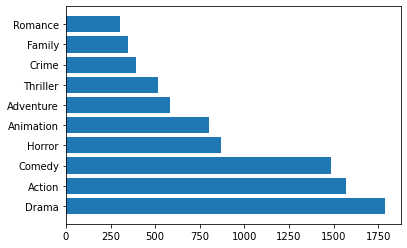

In [43]:

plt.barh(arr,arr_values)
plt.show()

In [44]:
dicts = {}
k=0
for i in arr:
    test= df.loc[df["Genre"]==i]
    dicts[i] = test['Popularity'].mean()
    k+=1
        


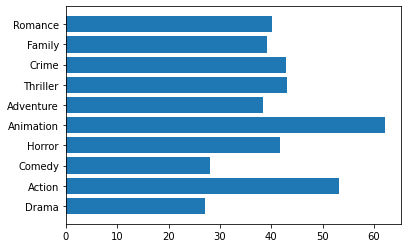

In [45]:
names = list(dicts.keys())
values = list(dicts.values())
plt.xticks(rotation=0)
plt.barh(names,values)
plt.show()
